#Bienvenido al curso de Análisis Exploratorio de Datos con Python

En este curso realizaremos un análisis exploratorio de datos de de los salarios en el rubro de IT en las 5 grandes empresas de tecnología cotizadas en NASDAQ: Facebook, Amazon, Apple, Google y Netflix.

Conoceremos la relación entre las diferentes variables que pueden influr en el salario de un profesional del rubro de tecnología.

In [1]:
#Primero importaremos las librerías necesarias para llevar a cabo la limpieza y análisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este dataset contiene información sobre diferentes posiciones dentro de más de 

In [2]:
#Hacer mención de que este dataset se puede encontrar en Kaggle, explicar por qué estamos utilizando este dataset: tipos de columnas, etc. 
df = pd.read_csv('/content/drive/MyDrive/Crehana/Análisis Exploratorio de Datos con Python y Pandas/Levels_Fyi_Salary_Data.csv')

df.sample(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
30106,9/16/2020 16:17:52,Microsoft,61,Data Scientist,227000,"Redmond, WA",3.0,0.0,Customer analytics,138000.0,35000.0,54000.0,Female,"40000 signing bonus, 10% annual merit bonus ta...",11521,819.0,41417,0,1,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
16715,2/14/2020 21:51:45,Pinterest,L4,Software Engineer,280000,"San Francisco, CA",4.0,4.0,Full Stack,140000.0,140000.0,1000.0,NaN,NaN,7419,807.0,22649,0,0,0,0,0,0,0,0,0,0,NaN,NaN
24012,7/11/2020 8:40:29,Cisco,11,Software Engineer,283000,"San Jose, CA",19.0,19.0,Networking,166000.0,85000.0,32000.0,Male,"Race: Asian, Academic Level: Master’s degree",7422,807.0,32902,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
45283,3/17/2021 15:01:07,JPMorgan Chase,602,Software Engineer,115000,"Houston, TX",3.0,2.0,Full Stack,102000.0,0.0,13000.0,Male,"Title: Software Engineer, Race: White, Academi...",11109,618.0,61882,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
17627,2/28/2020 11:19:01,HP,Master,Software Engineer,200000,"Vancouver, WA",14.0,14.0,Full Stack,165000.0,15000.0,20000.0,Male,Masters,11534,820.0,24008,1,0,0,0,0,0,0,0,0,0,NaN,Master's Degree


## Tipos de Datos

In [3]:
#Vemos nuestros tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [4]:
#De ser necesario, podemos cambiar el tipo de variable en cada columna
#En este caso y a modo de ejemplo, vamos a colocar la columna de timestamp como date_time y base salary como int

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['basesalary'] = df['basesalary'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

## Limpieza y Armado de Columnas

In [6]:
#Sacamos columnas que no utilizaremos en nuestro análisis
df.drop(['rowNumber', 'dmaid', 'cityid', 'stockgrantvalue', 'timestamp'], axis = 1, inplace = True)

In [8]:
def faang_classifier(company):
  faang = ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']
  if company in faang:
    return 1
  else:
    return 0


In [9]:
df['is_faang'] = df['company'].apply(lambda x: faang_classifier(x))
#df['is_faang'] = df['is_faang'].fillna(0)

## Valores Duplicados, Inexistentes y Outliers

In [7]:
df.replace("",np.nan, inplace = True)

In [10]:
df.isna().sum()

company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
is_faang                       0
dtype: int64

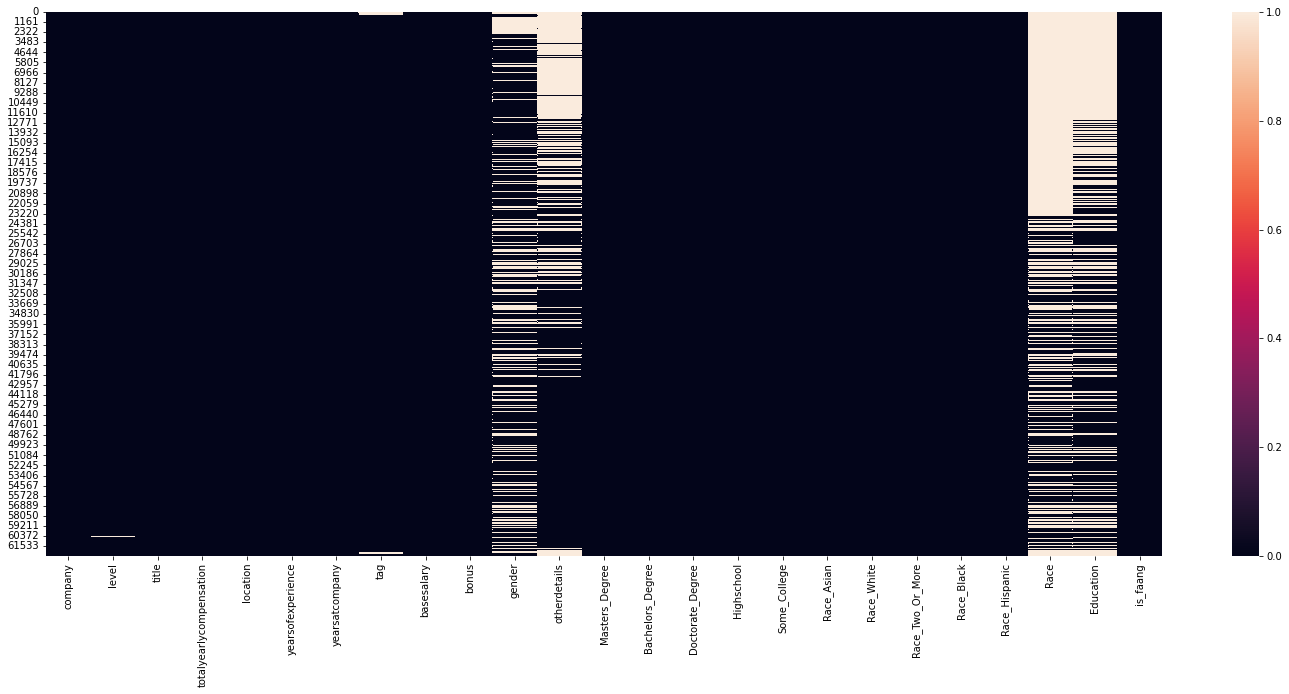

In [11]:
plt.figure(figsize = (25,10))

sns.heatmap(df.isna())

plt.show()

In [12]:
col_numericas = df.select_dtypes(['float64', 'int64'])
col_categoricas = df.select_dtypes(['object'])

In [13]:
#Reemplazamos valores faltantes con la mediana para variables numéricas
for col in col_numericas.columns:
  df[col].fillna(df[col].mean(), inplace = True)

In [14]:
#Reemplazamos valores faltantes para variables categóricas con la moda
for col in col_categoricas.columns:
  df[col].fillna(df[col].mode().values[0], inplace = True)

In [15]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
bonus                      0
gender                     0
otherdetails               0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
is_faang                   0
dtype: int64

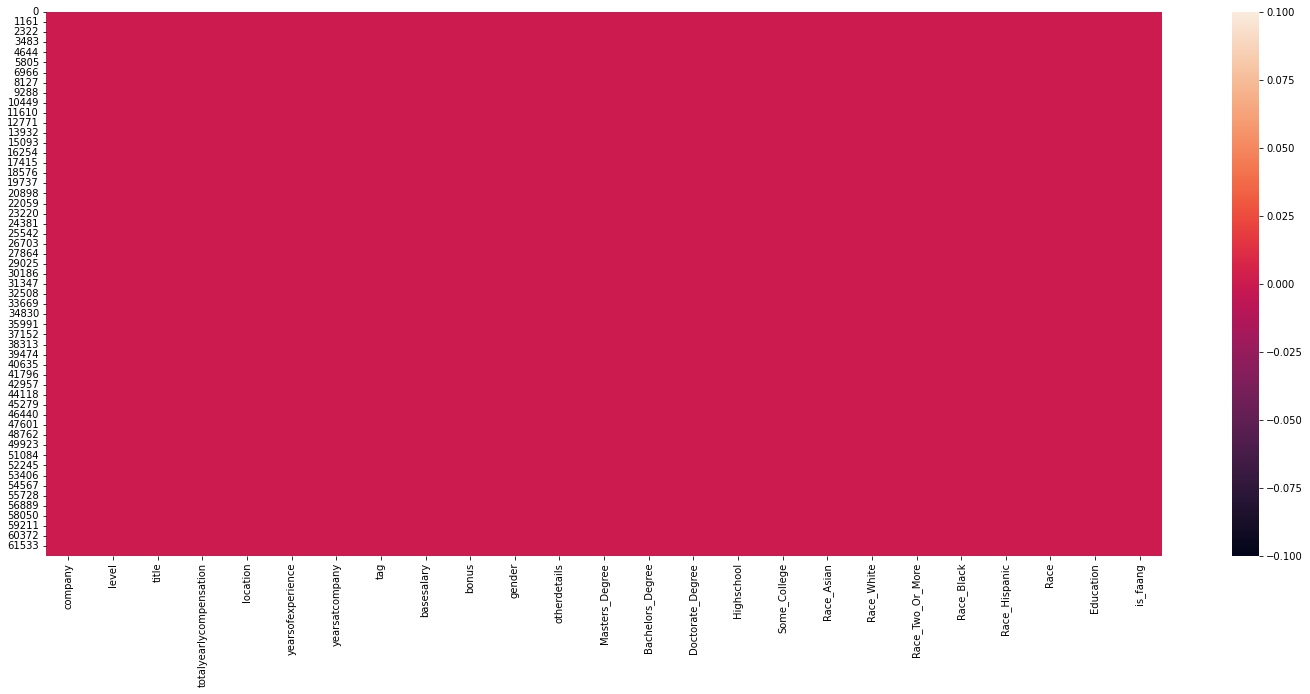

In [16]:
plt.figure(figsize = (25,10))

sns.heatmap(df.isna())

In [17]:
#Sacar datos duplicados
df.duplicated().sum()

302

In [18]:
df = df.drop_duplicates()

In [19]:
#Reemplazar valores erróneos
df.gender.value_counts()

Male                               54975
Female                              6967
Other                                397
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [20]:
df['gender'] = df['gender'].replace('Title: Senior Software Engineer', 'Other')
df['gender'] = df['gender'].replace(np.nan, 'Other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


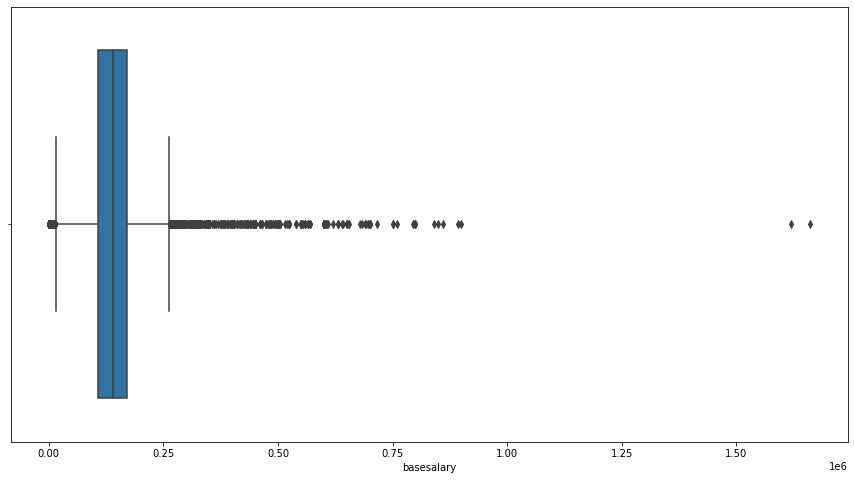

In [21]:
#Outliers
plt.figure(figsize = (15,8))

sns.boxplot(df.basesalary)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


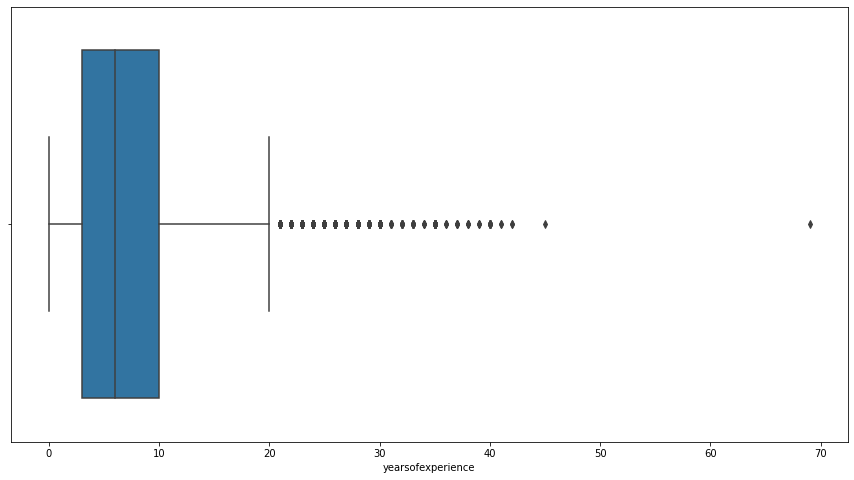

In [22]:
plt.figure(figsize = (15,8))

sns.boxplot(df.yearsofexperience)

plt.show()

In [23]:
#https://hmong.es/wiki/Winsorizing

from scipy.stats.mstats import winsorize

lim_inferior = 0.02
lim_superior = 0.02

#df['basesalary'] = winsorize(df['basesalary'], limits = [lim_inferior, lim_superior])

In [24]:

cols_to_winsorize = ['basesalary', 'yearsatcompany', 'yearsofexperience']

for col in cols_to_winsorize:
  df[col] = winsorize(df[col], limits = [lim_inferior, lim_superior])

In [25]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
count,6.234000e+04,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000,62340.000000
mean,2.163281e+05,7.136051,2.630751,135159.180382,19338.694189,0.246182,0.201861,0.028858,0.005133,0.005695,0.188450,0.128649,0.012865,0.011020,0.018094,0.282820
std,1.381433e+05,5.593899,2.927262,54702.034952,26800.859652,0.430789,0.401392,0.167408,0.071462,0.075248,0.391075,0.334814,0.112693,0.104398,0.133294,0.450373
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,108000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,170000.000000,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.980000e+06,22.000000,13.000000,250000.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Análisis Univariable

In [26]:
#Filtrar por FAANG

df = df[df['is_faang'] == 1]

In [27]:
df.sample(5)

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,is_faang
52140,Amazon,L4,Marketing,19000,"Bangalore, KA, India",5.0,4.0,Business Development,16000,0.0,Female,"Title: Account Manager, Race: Asian, Academic ...",1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,1
55258,Amazon,L4,Marketing,95000,"Seattle, WA",4.0,1.0,Digital Marketing,85000,5000.0,Female,"Title: Program Manager I, Race: White, Academi...",0,0,0,0,0,0,1,0,0,0,White,Master's Degree,1
38820,Facebook,E5,Software Engineer,405000,"Menlo Park, CA",7.0,0.0,Distributed Systems (Back-End),200000,30000.0,Male,Title: Software Engineer,0,0,0,0,0,0,0,0,0,0,Asian,Master's Degree,1
36587,Amazon,L6,Product Manager,220000,"Seattle, WA",9.0,1.0,Analytic,180000,0.0,Male,"Race: Asian, Academic Level: Master’s degree",1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,1
18609,Facebook,E1,Software Engineer,150000,"Los Angeles, CA",2.0,2.0,iOS,120000,10000.0,Male,Masters,1,0,0,0,0,0,0,0,0,0,Asian,Master's Degree,1


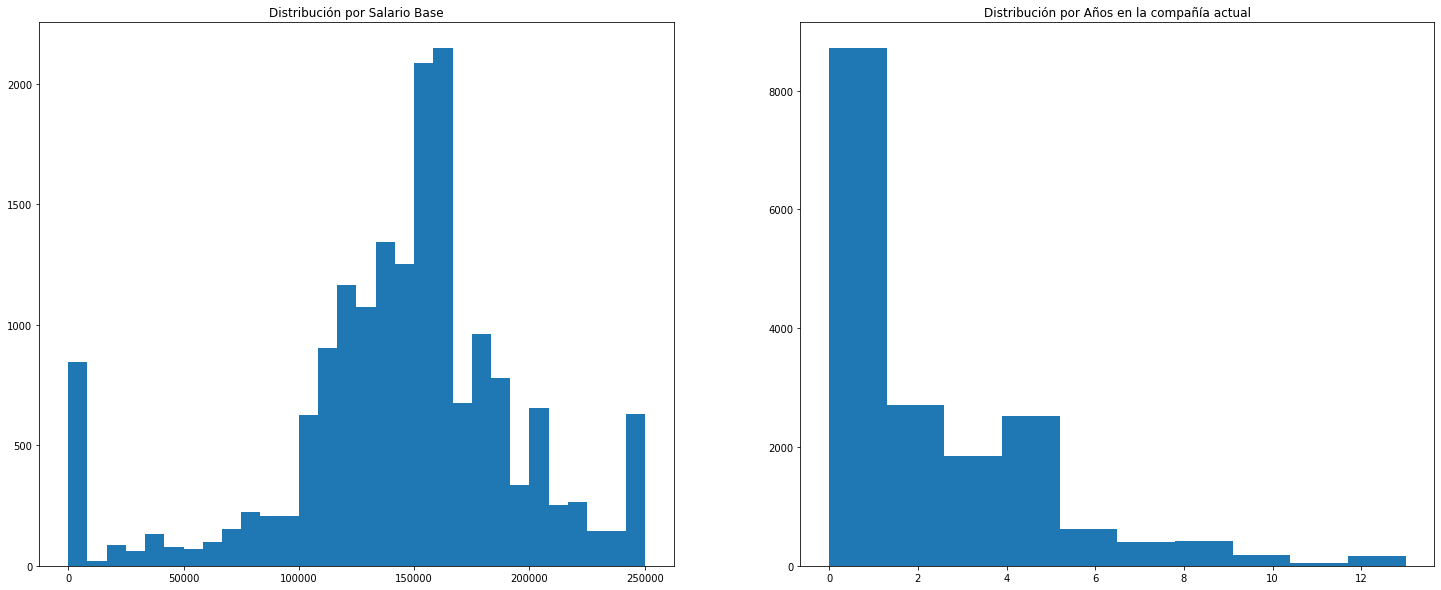

In [28]:
#Graficando variables numéricas
plt.figure(figsize = (25,10))

bins = round(np.sqrt(len(df.basesalary)))

plt.subplot(1,2,1)
plt.hist(x = df['basesalary'], bins = 30)
plt.title('Distribución por Salario Base')

plt.subplot(1,2,2)
plt.hist(x = df['yearsatcompany'], bins = 10)
plt.title('Distribución por Años en la compañía actual')

plt.show()

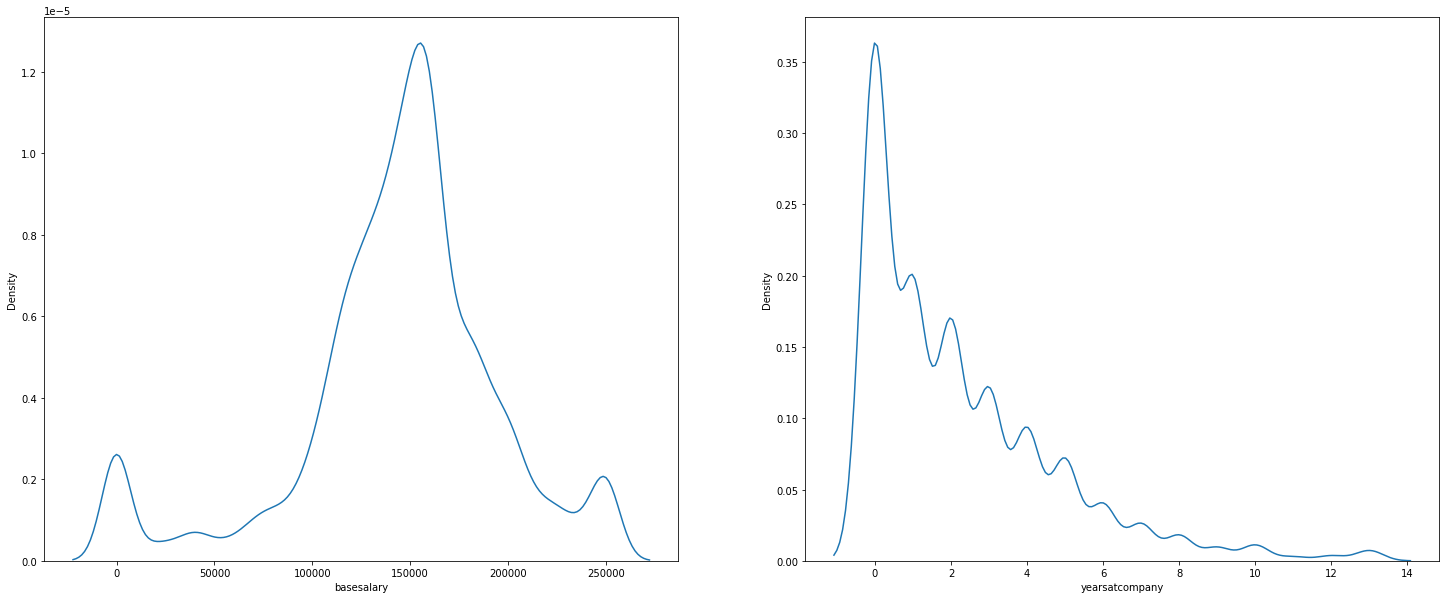

In [29]:
#Explicar KDE: Estimación Kernel de la Densidad

plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.kdeplot(data = df, x = 'basesalary')

plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'yearsatcompany')

plt.show()

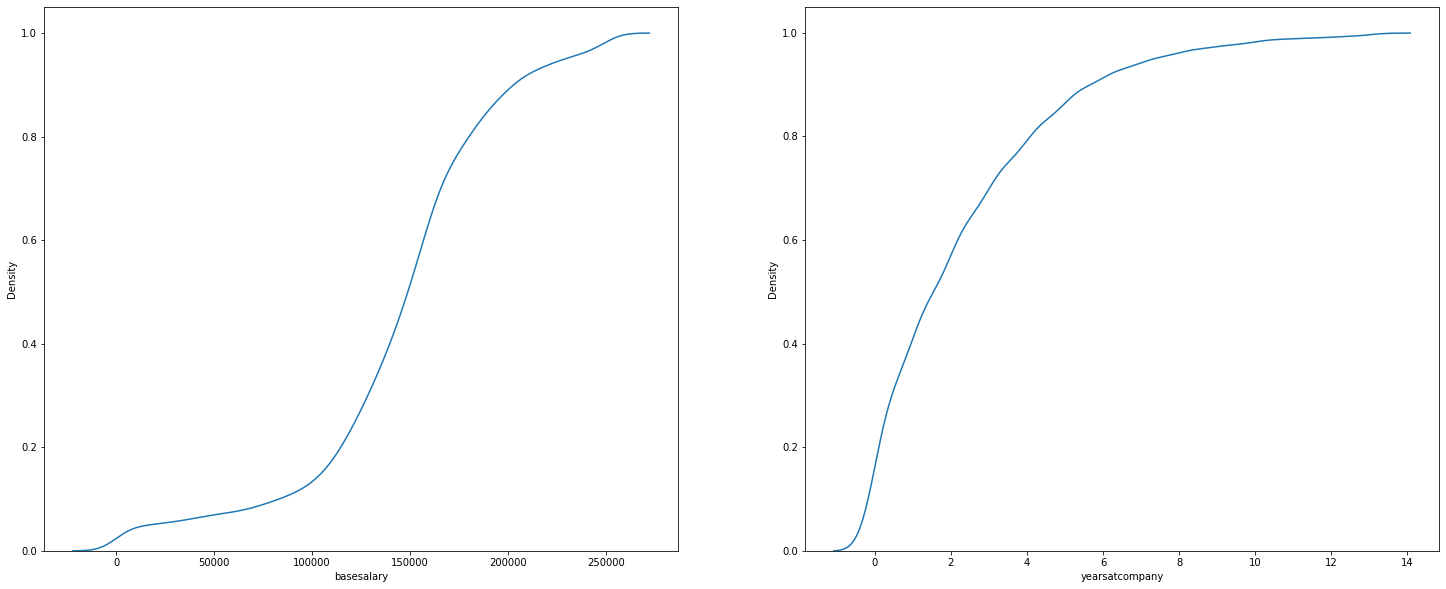

In [30]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.kdeplot(data = df, x = 'basesalary', cumulative = True)

plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'yearsatcompany', cumulative = True)

plt.show()

Simetría y Curtosis:

https://www.universoformulas.com/estadistica/descriptiva/asimetria-curtosis/#:~:text=La%20asimetr%C3%ADa%20y%20curtosis%20informan,sin%20necesidad%20de%20representarlos%20gr%C3%A1ficamente.

In [31]:
#Simetría y Curtosis
cols_skew_kurt = ['yearsatcompany', 'basesalary']

for i in cols_skew_kurt:
  print(i, ':')
  print('Esta distribución tiene una asimetría de ',df[i].skew())
  print('Esta distribución tiene una curtosis de ',df[i].kurt())
  print('-------------------------------')

yearsatcompany :
Esta distribución tiene una asimetría de  1.5221751524392069
Esta distribución tiene una curtosis de  2.580551342642708
-------------------------------
basesalary :
Esta distribución tiene una asimetría de  -0.7722729165891571
Esta distribución tiene una curtosis de  1.3460661286879585
-------------------------------


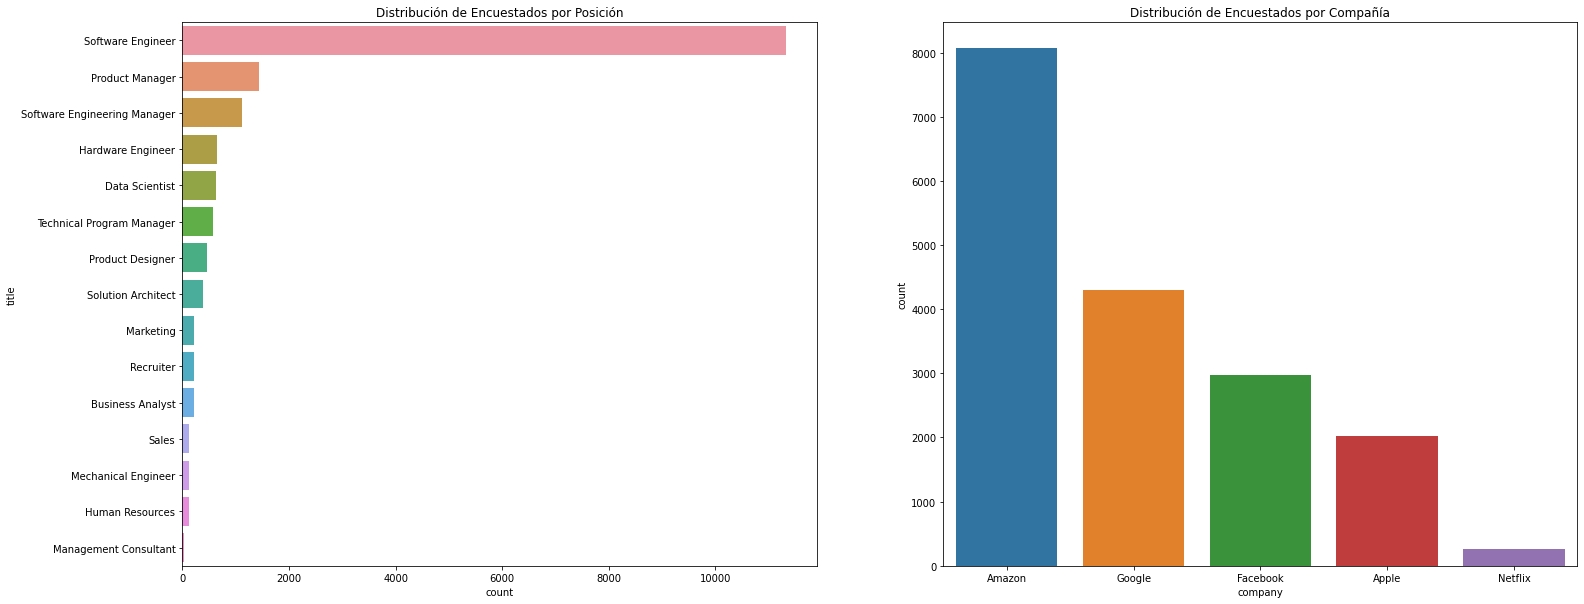

In [32]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.countplot(data = df, y = 'title', order = df['title'].value_counts().index)
plt.title('Distribución de Encuestados por Posición')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'company', order = df['company'].value_counts().index)
plt.title('Distribución de Encuestados por Compañía')

plt.show()

### Ubicando la Visualización Perfecta

https://www.data-to-viz.com/

## Análisis Multivariable

In [33]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,is_faang
totalyearlycompensation,1.000000,0.505560,0.316496,0.564444,0.418209,0.022206,-0.082902,0.097903,-0.010145,0.012303,-0.043455,0.018944,-0.004538,-0.015260,-0.031440,NaN
yearsofexperience,0.505560,1.000000,0.421088,0.350230,0.210733,0.053421,-0.058214,-0.011595,0.003775,0.033514,-0.062365,0.066464,-0.003121,-0.008161,-0.003114,NaN
yearsatcompany,0.316496,0.421088,1.000000,0.161512,-0.058416,-0.003674,-0.010417,0.003975,-0.011001,-0.004277,-0.012790,0.029405,-0.009327,-0.035978,-0.019515,NaN
basesalary,0.564444,0.350230,0.161512,1.000000,0.357533,0.112416,-0.031346,0.128746,0.001035,0.024629,0.009718,0.069095,0.013781,0.005623,-0.006218,NaN
bonus,0.418209,0.210733,-0.058416,0.357533,1.000000,0.031330,-0.028200,0.077814,-0.003788,0.009101,-0.002554,0.013662,0.018876,0.009041,0.002217,NaN
Masters_Degree,0.022206,0.053421,-0.003674,0.112416,0.031330,1.000000,-0.250626,-0.093022,-0.039420,-0.036770,0.306845,0.048339,0.026398,0.028403,0.011025,NaN
Bachelors_Degree,-0.082902,-0.058214,-0.010417,-0.031346,-0.028200,-0.250626,1.000000,-0.092885,-0.030844,-0.028770,0.262789,0.354188,0.106997,0.100231,0.151021,NaN
Doctorate_Degree,0.097903,-0.011595,0.003975,0.128746,0.077814,-0.093022,-0.092885,1.000000,-0.014589,-0.013608,0.048835,0.065070,0.004666,-0.004320,0.014172,NaN
Highschool,-0.010145,0.003775,-0.011001,0.001035,-0.003788,-0.039420,-0.030844,-0.014589,1.000000,-0.004519,-0.014557,0.097169,0.029262,0.025624,0.074144,NaN
Some_College,0.012303,0.033514,-0.004277,0.024629,0.009101,-0.036770,-0.028770,-0.013608,-0.004519,1.000000,-0.011178,0.115878,0.040370,0.019680,0.010201,NaN


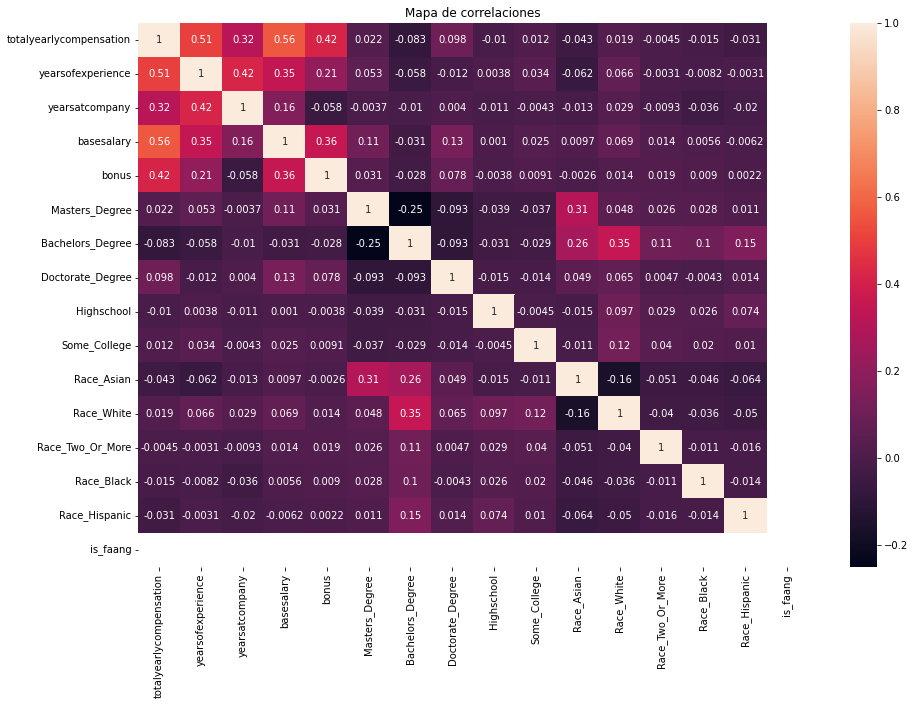

In [34]:
#Explicar corr ** 2
#https://socratic.org/questions/why-doesn-t-an-r-squared-value-indicate-anything-about-causation#:~:text=Explanation%3A,collected%2C%20fits%20an%20expected%20trend.&text=You%20can%20infer%20causation%2C%20but,be%20proven%20by%20statistical%20testing.

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Mapa de correlaciones')

plt.show()

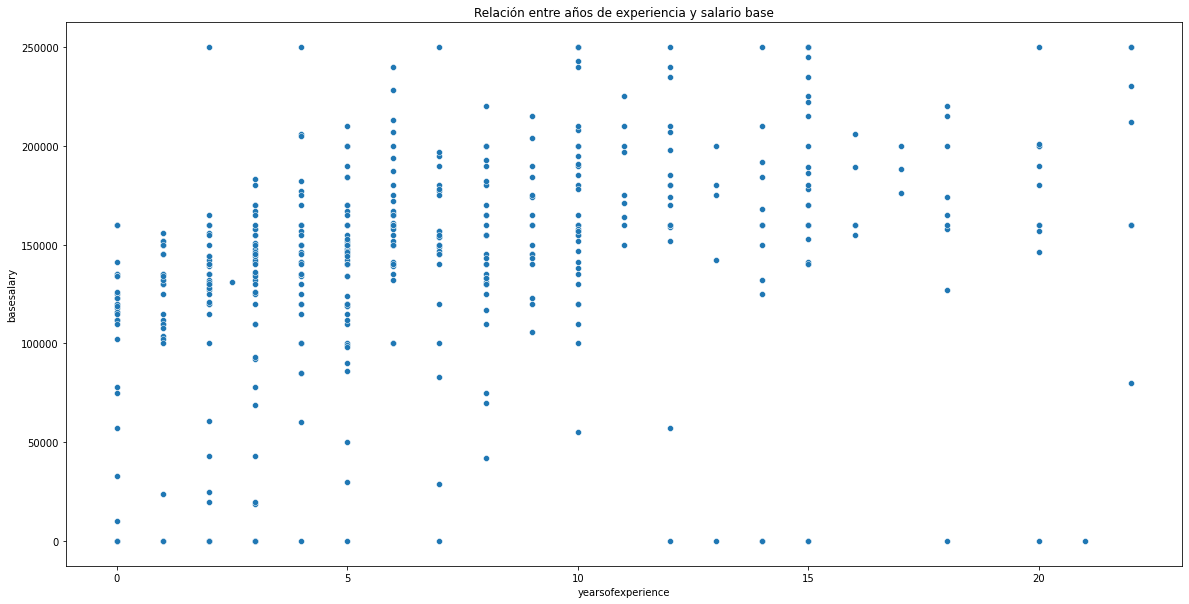

In [47]:
plt.figure(figsize = (20,10))

sns.scatterplot(data = df.sample(500), x = 'yearsofexperience', y = 'basesalary')
plt.title('Relación entre años de experiencia y salario base')

plt.show()

<Figure size 1440x720 with 0 Axes>

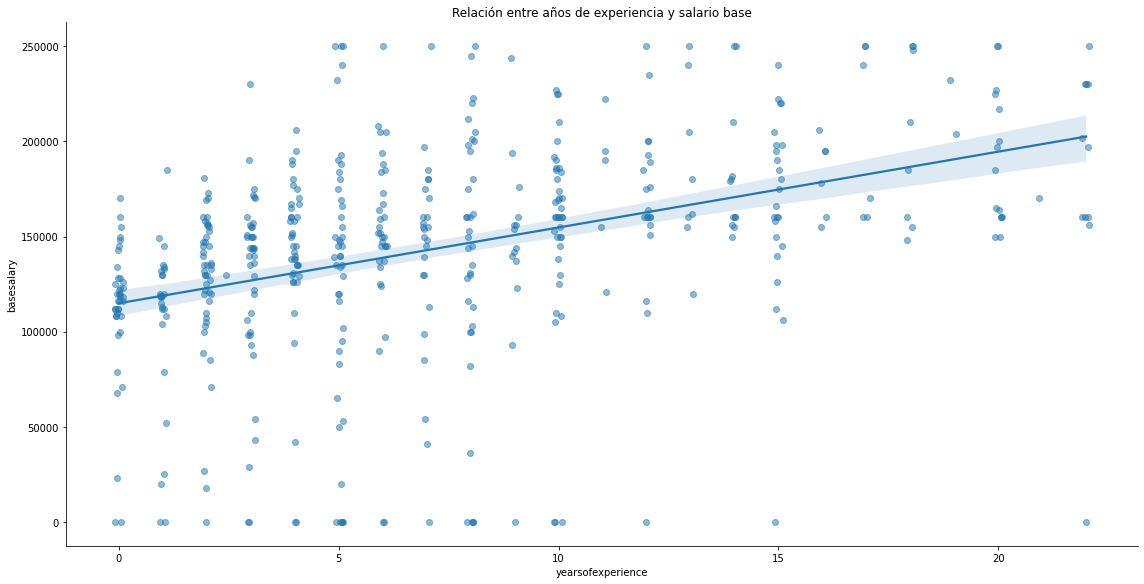

In [35]:
#Explicar scatterplot y lmplot, con y sin jittering
plt.figure(figsize = (20,10))

sns.lmplot(data = df.sample(500), x = 'yearsofexperience', y = 'basesalary', height= 8, aspect = 2, x_jitter = 0.1, scatter_kws={'alpha': 0.5})
plt.title('Relación entre años de experiencia y salario base')

plt.show()

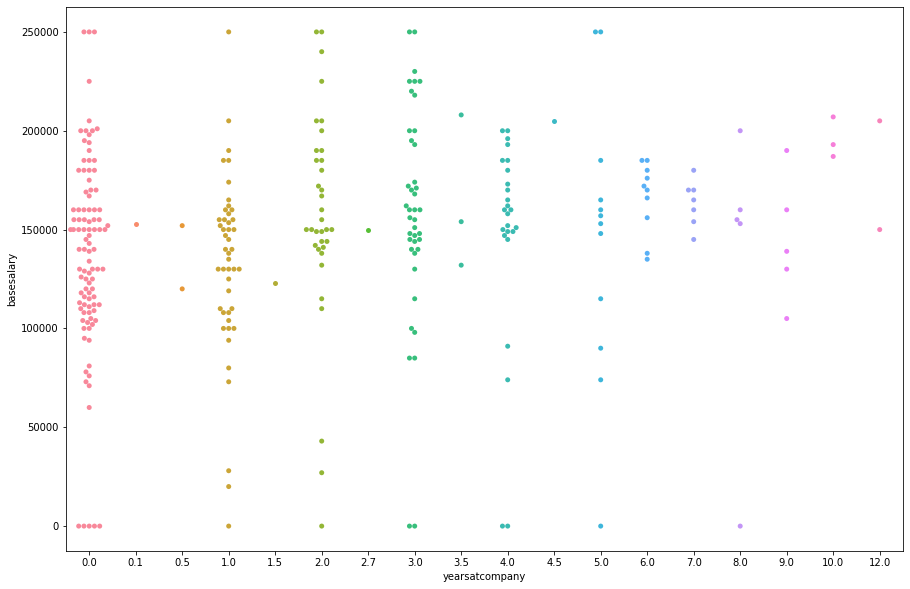

In [36]:
#Explicar desventaja muchos datapoints
plt.figure(figsize = (15,10))

sns.swarmplot(data = df.sample(300), x = 'yearsatcompany', y = 'basesalary')

plt.show()

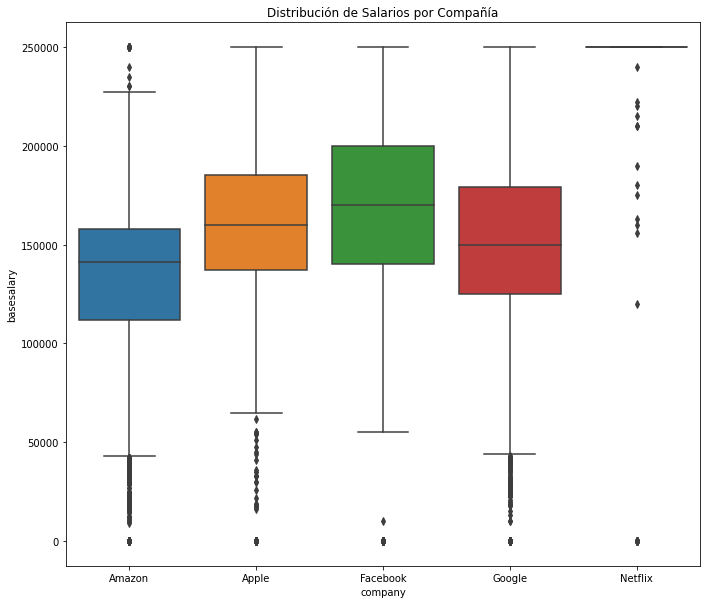

In [37]:
plt.figure(figsize = (25,10))

plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'company',y = 'basesalary')
plt.title('Distribución de Salarios por Compañía')


plt.show()

## Análisis Cualitativo

In [38]:
from wordcloud import WordCloud, STOPWORDS
#Creamos una nube de palabras

tag_words=""
stop_words = 'nan'
for i in df.tag: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    tag_words += " ".join(separate)+" "

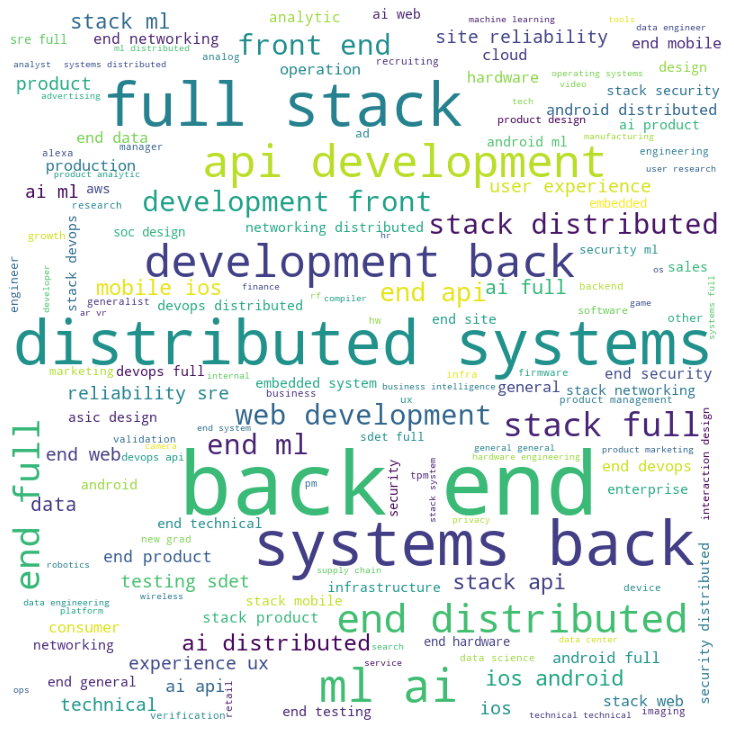

In [39]:
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(tag_words)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [40]:
tag_words=""
stop_words = {'nan', 'title'}
for i in df.otherdetails: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    tag_words += " ".join(separate)+" "

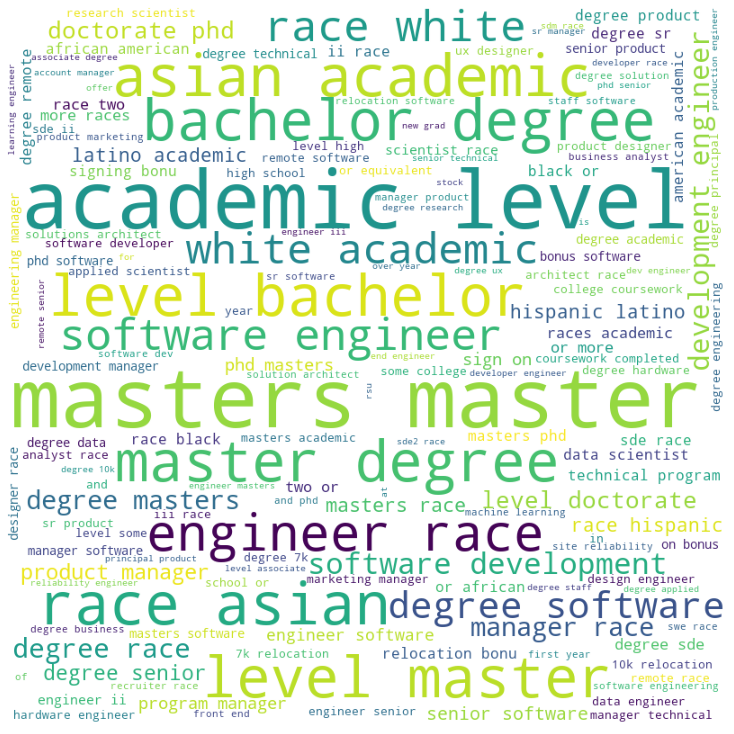

In [41]:
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(tag_words)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()